In [1]:
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np 
import rasterio 
import xarray

In [2]:
filepath = '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/'

filesPreFire = sorted(glob.glob(filepath + 'LandsatPreFire/*.TIF')) 
filesPostFire = sorted(glob.glob(filepath + 'LandsatPostFire/*.TIF'))
filesFire = sorted(glob.glob(filepath + 'Landsat10_03_Fire/*.TIF'))
filesRecent = sorted(glob.glob(filepath + 'Landsat_Feb11_2022/*.TIF'))


print(filesPreFire)
print(filesPostFire)
print(filesFire)
print(filesRecent)

['/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B1.TIF', '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B2.TIF', '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B3.TIF', '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B4.TIF', '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B5.TIF', '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B6.TIF', '/Users/jack/Documents/GitHub/geospatial-data-science/Final_Project/Drought_Data/LandsatPreFire/LC08_L2SP

In [3]:
list_bandsPreFire = [] 
for file in filesPreFire:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsPreFire.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsPreFire = np.dstack(list_bandsPreFire)

In [4]:
all_bands_imagePreFire = np.uint8((all_bandsPreFire / 65536) * 255)

In [5]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviPreFire = np.divide((all_bandsPreFire[:,:,4].astype(float) - all_bandsPreFire[:,:,3].astype(float)), \
                 (all_bandsPreFire[:,:,4].astype(float) + all_bandsPreFire[:,:,3].astype(float)))

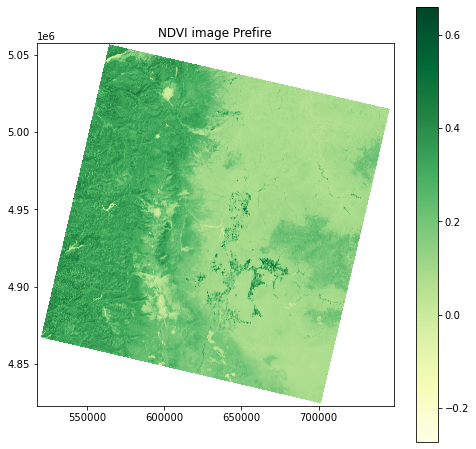

In [6]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPreFire, extent=full_extent, cmap = 'YlGn')
ax.set_title("NDVI image Prefire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [7]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrPreFire = np.divide((all_bandsPreFire[:,:,4].astype(float) - all_bandsPreFire[:,:,6].astype(float)), \
                 (all_bandsPreFire[:,:,4].astype(float) + all_bandsPreFire[:,:,6].astype(float)))

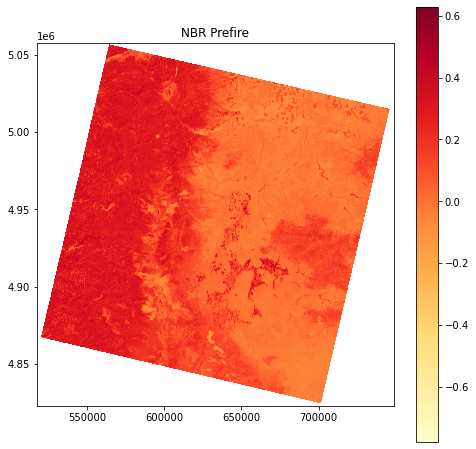

In [8]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPreFire, extent=full_extent, cmap = 'YlOrRd')
ax.set_title("NBR Prefire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [9]:
list_bandsFire = [] 
for file in filesFire:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsFire.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsFire = np.dstack(list_bandsFire)

In [10]:
all_bands_imageFire = np.uint8((all_bandsFire / 65536) * 255)

In [11]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviFire = np.divide((all_bandsFire[:,:,4].astype(float) - all_bandsFire[:,:,3].astype(float)), \
                 (all_bandsFire[:,:,4].astype(float) + all_bandsFire[:,:,3].astype(float)))

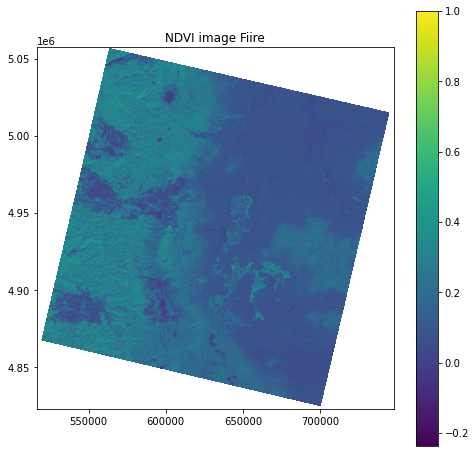

In [12]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviFire, extent=full_extent)
ax.set_title("NDVI image Fiire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [13]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrFire = np.divide((all_bandsFire[:,:,4].astype(float) - all_bandsFire[:,:,6].astype(float)), \
                 (all_bandsFire[:,:,4].astype(float) + all_bandsFire[:,:,6].astype(float)))

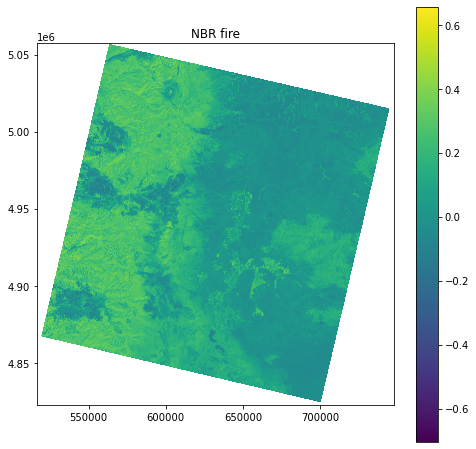

In [14]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrFire, extent=full_extent)
ax.set_title("NBR fire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [15]:
list_bandsPostFire = [] 
for file in filesPostFire:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsPostFire.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsPostFire = np.dstack(list_bandsPostFire)

In [16]:
all_bands_imagePostFire = np.uint8((all_bandsPostFire / 65536) * 255)

In [17]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviPostFire = np.divide((all_bandsPostFire[:,:,4].astype(float) - all_bandsPostFire[:,:,3].astype(float)), \
                 (all_bandsPostFire[:,:,4].astype(float) + all_bandsPostFire[:,:,3].astype(float)))

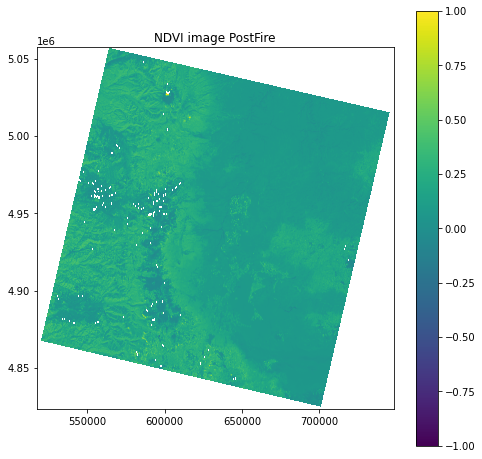

In [18]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPostFire, extent=full_extent)
ax.set_title("NDVI image PostFire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [19]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrPostFire = np.divide((all_bandsPostFire[:,:,4].astype(float) - all_bandsPostFire[:,:,6].astype(float)), \
                 (all_bandsPostFire[:,:,4].astype(float) + all_bandsPostFire[:,:,6].astype(float)))

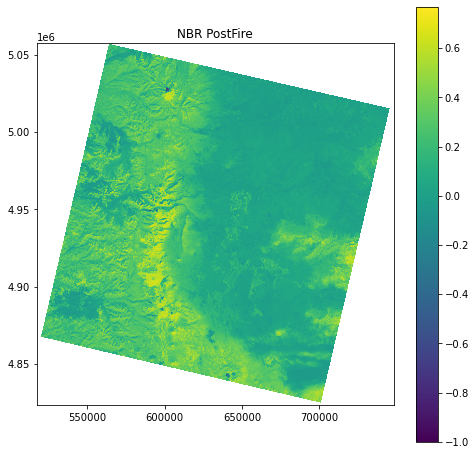

In [20]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPostFire, extent=full_extent)
ax.set_title("NBR PostFire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
list_bandsRecent = [] 
for file in filesRecent:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsRecent.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsRecent = np.dstack(list_bandsRecent)

In [ ]:
all_bands_imageRecent = np.uint8((all_bandsRecent / 65536) * 255)

In [ ]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviRecent = np.divide((all_bandsRecent[:,:,4].astype(float) - all_bandsRecent[:,:,3].astype(float)), \
                 (all_bandsRecent[:,:,4].astype(float) + all_bandsRecent[:,:,3].astype(float)))

In [ ]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviRecent, extent=full_extent)
ax.set_title("NDVI Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrRecent = np.divide((all_bandsRecent[:,:,4].astype(float) - all_bandsRecent[:,:,6].astype(float)), \
                 (all_bandsRecent[:,:,4].astype(float) + all_bandsRecent[:,:,6].astype(float)))

In [ ]:
src.bounds.left

In [ ]:
help(ax.imshow)

In [ ]:
nbrRecent

In [ ]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecent, extent=full_extent, cmap = 'Reds')
ax.set_title("NBR Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
# Plot NBR image
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecent, extent=zoom_extent, cmap = 'Reds')
ax.set_title("NBR Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
# Plot NBR image
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecent, cmap = 'Reds')
ax.set_title("NBR Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

In [ ]:
nbrRecent[3000:5000, 2000:4000]

In [ ]:
#mat_row_index = (3000:6000)#range(3000, 6000)
#mat_col_index = (2000:4000)#range(2000, 4000)
# Plot NBR image
nbrRecentcrop = nbrRecent[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecentcrop, cmap = 'YlOrRd')
ax.set_title("NBR Recent 2/11/2022")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
nbrFirecrop = nbrFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrFirecrop, cmap = 'YlOrRd')
ax.set_title("NBR Fire 10/03/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
nbrPostFirecrop = nbrPostFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPostFirecrop, cmap = 'YlOrRd')
ax.set_title("NBR PostFire 11/20/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
nbrPreFirecrop = nbrPreFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPreFirecrop, cmap = 'YlOrRd', )
ax.set_title("NBR PreFire 9/01/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
ndviPreFirecrop = ndviPreFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPreFirecrop, cmap = 'YlGn')
ax.set_title("NDVI Pre-Fire 9/01/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
ndviFirecrop = ndviFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviFirecrop, cmap = 'YlGn')
ax.set_title("NDVI Fire 10/03/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
ndviPostFirecrop = ndviPostFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPostFirecrop, cmap = 'YlGn')
ax.set_title("NDVI Post-Fire 11/20/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

In [ ]:
ndviRecentcrop = ndviRecent[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviRecentcrop, cmap = 'YlGn')
ax.set_title("NDVI Recent Image 2/11/2022")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)

plt.show()
